In [1]:
%matplotlib inline
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
import math

TIC = 'TIC 243641947'

In [2]:
search_ffi = lk.search_tesscut(TIC)

In [3]:
search_ffi

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 11,2019,TESScut,1426,TIC 243641947,0.0
1,TESS Sector 38,2021,TESScut,475,TIC 243641947,0.0


In [4]:
search_tpf = lk.search_targetpixelfile(TIC)

In [5]:
search_tpf

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 11,2019,TESS-SPOC,1800,243641947,0.0
1,TESS Sector 38,2021,TESS-SPOC,600,243641947,0.0


In [6]:
search_lcf = lk.search_lightcurve(TIC)

In [7]:
search_lcf

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 11,2019,TESS-SPOC,1800,243641947,0.0
1,TESS Sector 11,2019,QLP,1800,243641947,0.0
2,TESS Sector 38,2021,TESS-SPOC,600,243641947,0.0
3,TESS Sector 38,2021,QLP,600,243641947,0.0


In [8]:
search_lcf_refined = lk.search_lightcurve(TIC, author="TESS-SPOC", exptime=600)

In [9]:
search_lcf_refined

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 38,2021,TESS-SPOC,600,243641947,0.0


In [10]:
lcf = search_lcf_refined.download_all()

In [11]:
lcf

LightCurveCollection of 1 objects:
    0: <TessLightCurve LABEL="TIC 243641947" SECTOR=38 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>

In [12]:
lcf[0]

time,flux,flux_err,timecorr,cadenceno,centroid_col,centroid_row,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,electron / s,electron / s,d,,pix,pix,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
Time,float32,float32,float32,int32,float64,float64,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
2333.869657550008,6.2761798e+02,3.1251862e+00,4.9122437e-03,159322,1254.42038,467.76065,7.7728735e+02,2.4457173e+00,1.1588329e+03,1.0718498e+00,6.2761798e+02,3.1251862e+00,0,———,———,———,———,1254.42038,1.9840288e-03,467.76065,2.1354565e-03,-2.8713815e-02,1.3624737e-01
2333.876602017912,6.3058618e+02,3.1290674e+00,4.9122702e-03,159323,1254.41717,467.76132,7.8027435e+02,2.4487545e+00,1.1637275e+03,1.0757250e+00,6.3058618e+02,3.1290674e+00,0,———,———,———,———,1254.41717,1.9823210e-03,467.76132,2.1252993e-03,-2.8390327e-02,1.3742754e-01
2333.8835464853487,6.2909314e+02,3.1280479e+00,4.9122963e-03,159324,1254.41868,467.76051,7.7897656e+02,2.4479568e+00,1.1656932e+03,1.0751430e+00,6.2909314e+02,3.1280479e+00,0,———,———,———,———,1254.41868,1.9819355e-03,467.76051,2.1304141e-03,-2.9791854e-02,1.3858786e-01
2333.890490952785,6.2930554e+02,3.1315050e+00,4.9123224e-03,159325,1254.41989,467.75903,7.8003247e+02,2.4506621e+00,1.1685857e+03,1.0765867e+00,6.2930554e+02,3.1315050e+00,0,———,———,———,———,1254.41989,1.9823273e-03,467.75903,2.1296050e-03,-3.1215984e-02,1.4006768e-01
2333.8974354206885,6.2735730e+02,3.1334729e+00,4.9123489e-03,159326,1254.42244,467.76130,7.7868542e+02,2.4522023e+00,1.1720532e+03,1.0780389e+00,6.2735730e+02,3.1334729e+00,0,———,———,———,———,1254.42244,1.9864417e-03,467.76130,2.1345878e-03,-3.1221911e-02,1.4119622e-01
2333.904379888592,6.3041730e+02,3.1354051e+00,4.9123755e-03,159327,1254.42192,467.76111,7.8086438e+02,2.4537141e+00,1.1728838e+03,1.0780356e+00,6.3041730e+02,3.1354051e+00,0,———,———,———,———,1254.42192,1.9811839e-03,467.76111,2.1287450e-03,-3.0567653e-02,1.3953388e-01
2333.911324356028,6.3129333e+02,3.1394076e+00,4.9124015e-03,159328,1254.42063,467.76266,7.8182166e+02,2.4568467e+00,1.1763707e+03,1.0788471e+00,6.3129333e+02,3.1394076e+00,0,———,———,———,———,1254.42063,1.9824819e-03,467.76266,2.1289815e-03,-3.0172665e-02,1.4256863e-01
2333.9182688239316,6.2673169e+02,3.1368256e+00,4.9124281e-03,159329,1254.42494,467.76230,7.7820001e+02,2.4548261e+00,1.1759241e+03,1.0792240e+00,6.2673169e+02,3.1368256e+00,0,———,———,———,———,1254.42494,1.9909278e-03,467.76230,2.1387057e-03,-3.0717887e-02,1.4163868e-01


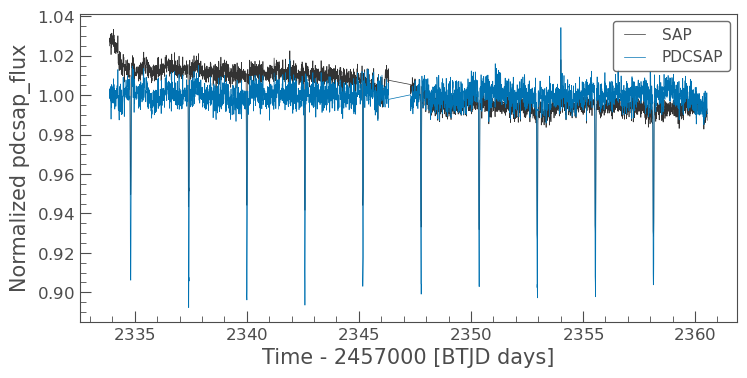

In [13]:
ax = lcf[0].plot(column='sap_flux', normalize=True, label="SAP");
lcf[0].plot(ax=ax, column='pdcsap_flux', normalize=True, label="PDCSAP");

Text(0.5, 1.0, 'PDCSAP light curve of TIC 243641947')

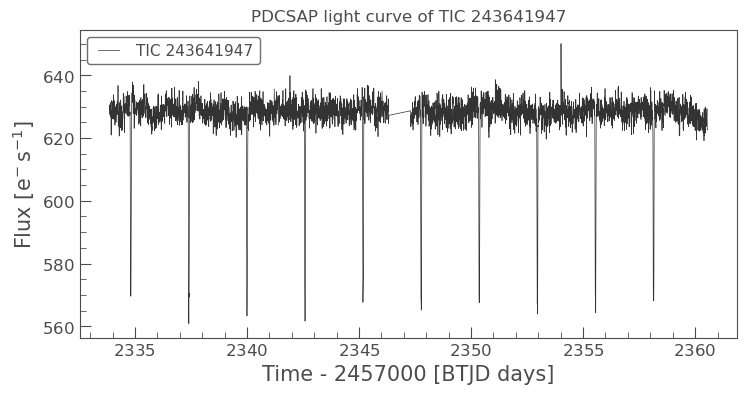

In [14]:
ax = lcf[0].plot() 
ax.set_title("PDCSAP light curve of TIC 243641947")

In [15]:
flat_lc = lcf[0].flatten(window_length=401)
folded_lc = flat_lc.fold(period=2.592493924939249350)
binned_lc = folded_lc.bin(time_bin_size=0.01)

<AxesSubplot:xlabel='Phase [JD]', ylabel='Normalized Flux'>

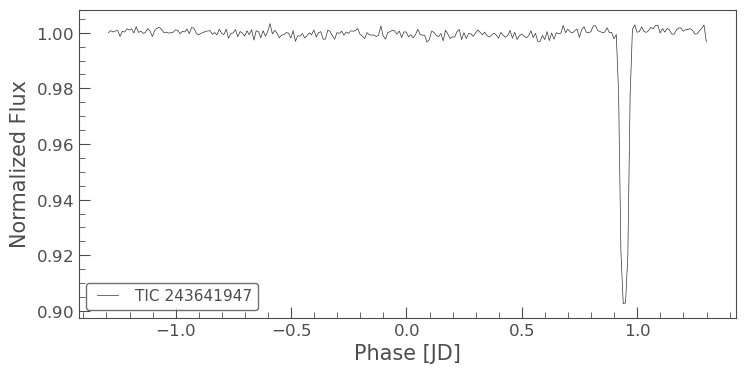

In [16]:
lcf[0].flatten(window_length=401).fold(period=2.592493924939249350).bin(time_bin_size=0.01).plot()

In [17]:
lcf[0].interact_bls()

In [18]:
ffi_data = search_ffi[1].download(cutout_size=25)

<AxesSubplot:title={'center':'Target ID: TIC 243641947, Cadence: 0'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

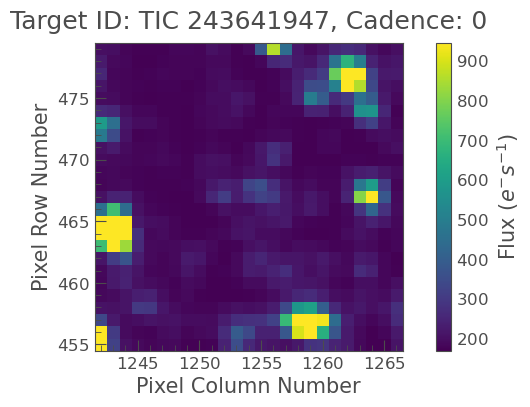

In [19]:
ffi_data.plot()

In [20]:
target_mask = ffi_data.create_threshold_mask(threshold=15, reference_pixel='center')
n_target_pixels = target_mask.sum()
n_target_pixels

2

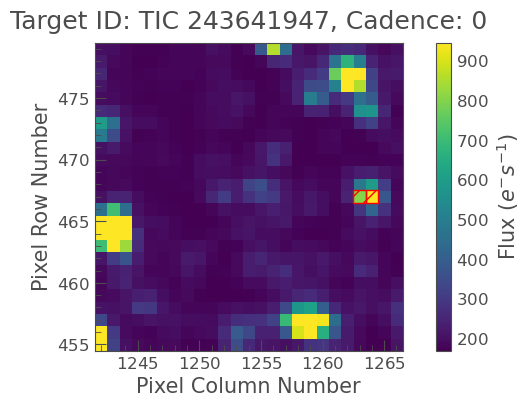

In [21]:
ffi_data.plot(aperture_mask=target_mask, mask_color='r');

In [22]:
ffi_lc = ffi_data.to_lightcurve(aperture_mask=target_mask)

In [23]:
ffi_lc

time,flux,flux_err,centroid_col,centroid_row,cadenceno,quality
,electron / s,electron / s,pix,pix,,
Time,float32,float32,float64,float64,int32,int32
2333.8625264995426,1778.4786376953125,2.037252426147461,1263.547998987185,467.0,0,0
2333.869470975828,1777.037353515625,2.036504030227661,1263.5477270120055,467.0,1,0
2333.876415452113,1780.464599609375,2.038487195968628,1263.5472938451617,466.99998399102236,2,0
2333.883359928398,1779.1724853515625,2.0375707149505615,1263.5470003700177,467.0,3,0
2333.890304404682,1781.694091796875,2.038811445236206,1263.5466966911622,466.99998400206965,4,0
2333.897248880967,1778.13671875,2.0369961261749268,1263.546399559647,466.9999839700639,5,0
2333.904193357718,1782.0418701171875,2.040053606033325,1263.5470328877232,467.0,6,0
2333.911137834002,1780.018798828125,2.038196086883545,1263.547026508317,467.0,7,0


<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

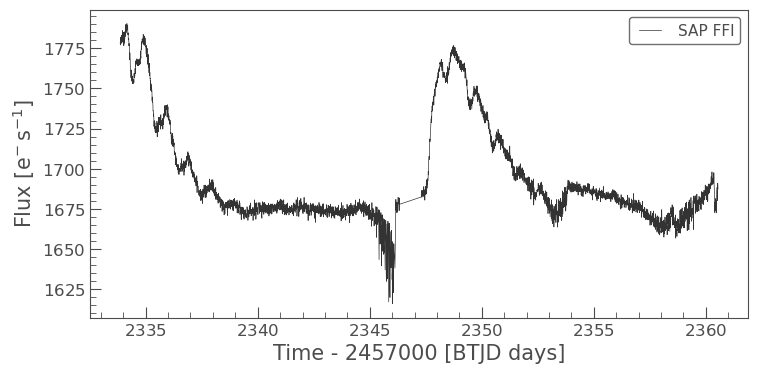

In [24]:
ffi_lc.plot(label="SAP FFI")

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

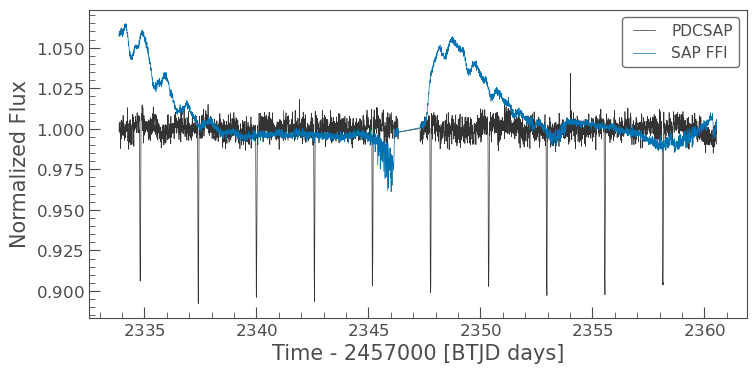

In [25]:
ax = lcf[0].plot(column='pdcsap_flux', normalize=True, label="PDCSAP");
ffi_lc.plot(ax=ax, normalize=True, label="SAP FFI")

In [26]:
ffi_data.interact()
ffi_data.interact_sky()

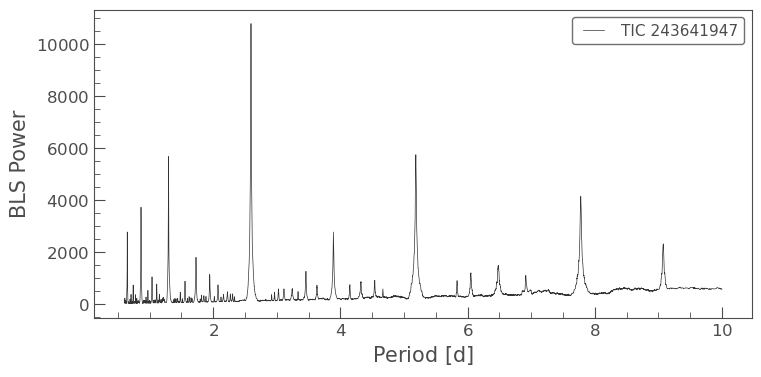

In [27]:
periodogram = flat_lc.to_periodogram(method="bls", period=np.arange(0.6, 10, 0.001))
periodogram.plot();

In [28]:
best_fit_period = periodogram.period_at_max_power
print('Best fit period: {:.3f}' .format(best_fit_period))

Best fit period: 2.593 d


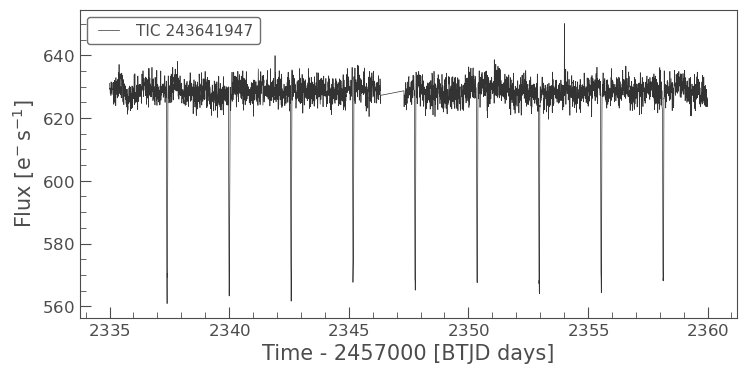

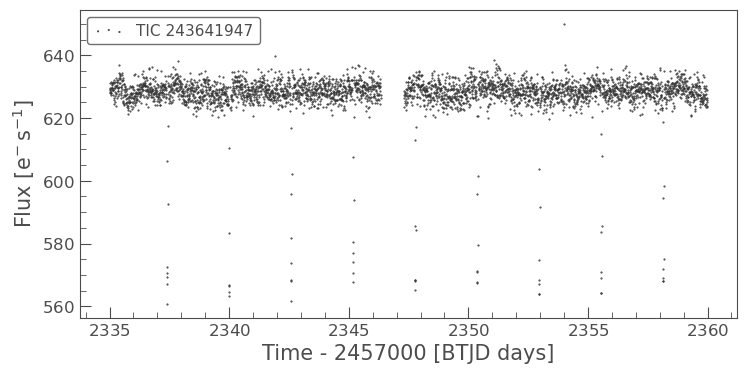

In [29]:
mask = ((lcf[0].time.value < 2360)&(lcf[0].time.value > 2335))
masked_lc=lcf[0][mask];
masked_lc.plot();
masked_lc.scatter(s=1);

In [30]:
# Assume masked_lc is the light curve object with any NaNs removed.
period = np.linspace(0.4, 30, 100000)  # limit the period range to 0.4 to 30
bls = masked_lc.to_periodogram(method='bls', period=period, frequency_factor=100)

(0.0, 10207.039711)

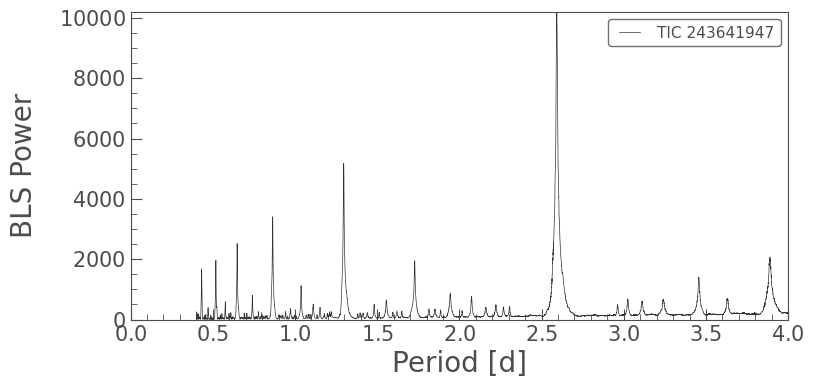

In [31]:
# Plot the periodogram
bls.plot()
plt.ylabel('BLS Power', fontsize=20, labelpad=15)
plt.xlabel('Period [d]', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlim(0, 4)
plt.ylim([0, 10207.039711])

In [32]:
# Find the periods and powers sorted by power
powers = bls.power
periods = bls.period
sorted_indices = np.argsort(powers)[::-1]
sorted_powers = powers[sorted_indices]
sorted_periods = periods[sorted_indices]
sorted_transits = sorted_transits = bls.transit_time.jd[sorted_indices]

In [33]:
# Print the periods and powers of the highest and second highest peaks
# Reasoning behind 9 is that is the most confirmed and unconfirmed planets of a solar system (the Sun's solar system)
for i in range(9):
    # check if the current power has a different mantissa than the previous one
    if i > 0 and np.floor(np.log10(sorted_powers[i])) != np.floor(np.log10(sorted_powers[i-1])):
        print('----------------------------------------')
    print(f'Period at {i+1}th max power = {sorted_periods[i]:.18f}')
    print(f'BLS max power = {sorted_powers[i]:f}')
    print(f'Epoch max power = {sorted_transits[i]:f}')
    print('----------------------------------------')

Period at 1th max power = 2.592493924939249350 d
BLS max power = 10207.039711
Epoch max power = 2459337.406606
----------------------------------------
Period at 2th max power = 2.592197921979219721 d
BLS max power = 10041.023045
Epoch max power = 2459337.406606
----------------------------------------
Period at 3th max power = 2.592789927899278979 d
BLS max power = 10037.843955
Epoch max power = 2459337.406606
----------------------------------------
Period at 4th max power = 2.593381933819338236 d
BLS max power = 10036.963046
Epoch max power = 2459337.401606
----------------------------------------
----------------------------------------
Period at 5th max power = 2.591901919019190093 d
BLS max power = 9978.390717
Epoch max power = 2459337.406606
----------------------------------------
Period at 6th max power = 2.593085930859308608 d
BLS max power = 9970.009835
Epoch max power = 2459337.401606
----------------------------------------
Period at 7th max power = 2.591605916059160908 d


C:\Users\andre\anaconda3\lib\site-packages\lightkurve\lightcurve.py:1040: LightkurveWarning: `epoch_time` appears to be given in JD, however the light curve time uses BTJD (i.e. JD - 2457000).
  warnings.warn(


(500.0, 700.0)

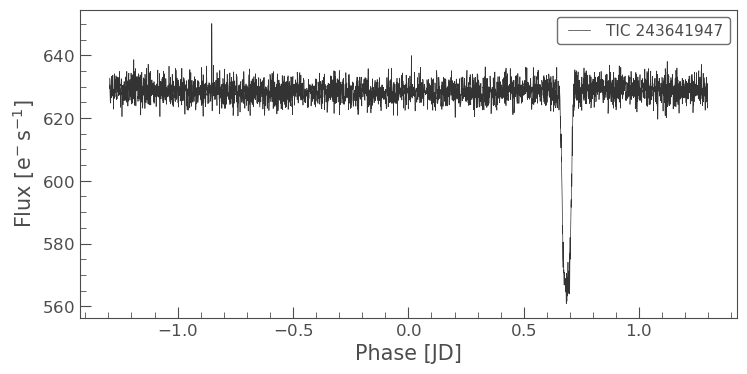

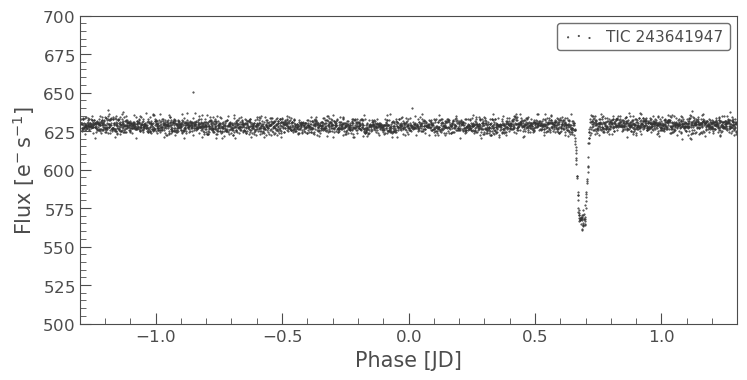

In [34]:
#Here we will fold the lightcurve based on the period and the epoch time we found earlier.
#After folding your light curve you should see a signal (transit) on phase 0.
periodvalue= 2.592493924939249350
epochtime = 2459282.100089
folded_lc = masked_lc.fold(periodvalue, epoch_time=epochtime)
folded_lc.plot();
folded_lc.scatter(s=1)
#Limits on x and y axis are given manually. You may need to change them.
plt.xlim(-1.3,1.3)
plt.ylim([500,700])

C:\Users\andre\anaconda3\lib\site-packages\lightkurve\lightcurve.py:1040: LightkurveWarning: `epoch_time` appears to be given in JD, however the light curve time uses BTJD (i.e. JD - 2457000).
  warnings.warn(


(500.0, 700.0)

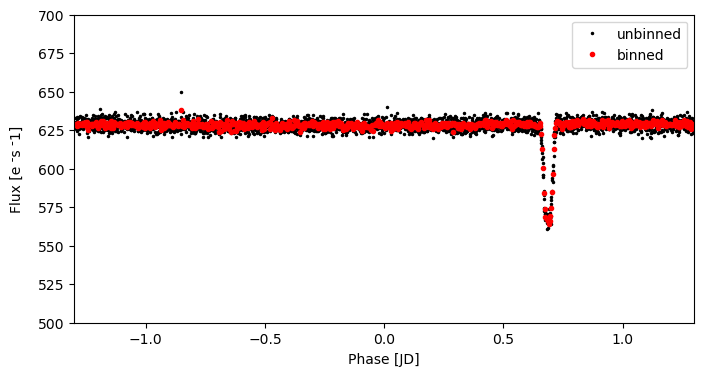

In [35]:
period  = periodvalue
t0 = epochtime 

folded2_lc = masked_lc.fold(periodvalue, epoch_time=epochtime)

#Bin the folded lightcurve. Here we bin at 30 minutes.
folded2_lc_binned = folded_lc.bin(5/24/60)

fig, ax = plt.subplots(figsize = (8,4))

folded2_lc.plot(ax = ax, marker = '.', linewidth = 0, color = 'black', alpha = 1, markersize = 3)
folded2_lc_binned.plot(ax = ax, marker = 'o', linewidth = 0, color = 'red', alpha = 1, markersize = 3)
plt.legend(labels= ['unbinned', 'binned'], fontsize=10)
plt.ylabel('Flux [e ־s ־1]', fontsize=10, labelpad=10)
plt.xlabel('Phase [JD]', fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
#Limits on x and y axis are given manually. You may need to change them.
plt.xlim(-1.3,1.3)
plt.ylim([500,700])

In [36]:
min = np.nanmin(folded2_lc_binned.flux) #Minimum flux of the binned lightcurve
print('Minimum flux = ', min)
median = np.nanmedian(folded2_lc_binned.flux) #Median flux of the binned lightcurve. The median flux should be equal to 1.
print('median flux =', median)
Tdepth = median - min
print('Tdepth = ', Tdepth)
print('Tdepth in ppm = ', Tdepth * (10**6), 'ppm')
ratio = np.sqrt(Tdepth)
print('Rp/Rs ratio = ', ratio) #Exoplanet's radius and Star's radius ratio.

Minimum flux =  564.2454223632812 electron / s
median flux = 628.6080932617188 electron / s
Tdepth =  64.3626708984375 electron / s
Tdepth in ppm =  64362670.8984375 electron / s ppm
Rp/Rs ratio =  8.022634909955551 electron(1/2) / s(1/2)


In [37]:
planet_b_period = bls.period_at_max_power
planet_b_t0 = bls.transit_time_at_max_power
planet_b_dur = bls.duration_at_max_power

In [38]:
planet_b_dur
print('Transit duration in hours=', planet_b_dur*24, 'hours')

Transit duration in hours= 1.2000000000000002 d hours


In [39]:
#Transit depth from bls model
planet_b_depth = bls.depth_at_max_power
print('depth = ', planet_b_depth)
print('depth in ppm =', planet_b_depth * (10**6), 'ppm')

depth =  50.38253329222608 electron / s
depth in ppm = 50382533.292226076 electron / s ppm


In [40]:
print(bls.period_at_max_power)
print(bls.transit_time_at_max_power)
print(bls.duration_at_max_power)

2.5924939249392494 d
2337.40660622469
0.05 d


In [41]:
P = 2.592493924939249350 * 24 * 60 * 60 #planet's period
G = 6.674* 10 ** -11 #gravitational constant
Msun = 1.98847 * 10**30 #Sun mass
M = 0.359832 * Msun #Star's mass
pi = math.pi
a = ((P**2)/((4*pi**2)/(G*M)))**(1/3) #Orbital radius or semi-major axis
print('Orbital Radius')
print('a =',a , 'm')
print('a =',a/1000 , 'km')
print('a =',a/1000 * 0.000000006684587, 'AU')
print('The planetary mass was neglected')

Orbital Radius
a = 3929790728.847598 m
a = 3929790.728847598 km
a = 0.02626902801877518 AU
The planetary mass was neglected


In [42]:
L = 0.01619618 #Star's luminosity
ri= (L/1.1)**(1/2)
ro= (L/0.53)**(1/2)
print('Habitable Zone')
print('The inner boundary of the habitable zone ri =', ri, 'AU')
print('The outer boundary of the habitable zone ro =', ro, 'AU')

Habitable Zone
The inner boundary of the habitable zone ri = 0.12134166638051416 AU
The outer boundary of the habitable zone ro = 0.17481084116461212 AU


In [43]:
Rs = 0.37223 #Star's radius
Transit_depth = Tdepth
Rsun  = 696340 #Sun radius
Rearth = 6371 #Earth radius
Rp = (Rs * Transit_depth ** (1/2)) * Rsun #Exoplanet's radius
print('Planet Radius')
print('Rp =', Rp, 'km')
print('Rp=',Rp/Rearth, 'Radius of the Earth')
aRs = (a/1000)/(Rs*Rsun)
print('Orbital Period and Star Radius ratio')
print('a/Rs =', aRs)

Planet Radius
Rp = 2079456.0434362583 electron(1/2) / s(1/2) km
Rp= 326.39397950655444 electron(1/2) / s(1/2) Radius of the Earth
Orbital Period and Star Radius ratio
a/Rs = 15.161309319130511


In [44]:
P = 2.592493924939249350 * 24 * 60 * 60
pi = math.pi
a = 5388848826.434916 #semi-major axis in meters
v = (2*pi*a/P)
print('Planet Velocity')
print('v =',v , 'm/s')

Planet Velocity
v = 151162.6089855506 m/s


In [45]:
print('Period = ',bls.period_at_max_power)
print('Transit duration in hours planet disk fully superimposed to the stellar disk positions 2 - 3 Tf = ', bls.duration_at_max_power*24,'hours')
print('- - - - - - - - - - - - - - - - - - - - ')
print('Transit depth = ', Tdepth)
print('Transit depth in ppm = ', Tdepth * (10**6), 'ppm')
print('Transit Depth from bls model in ppm =', planet_b_depth * (10**6), 'ppm')
ratio = np.sqrt(Tdepth)
print('Rp/Rs ratio = ', ratio)
print('- - - - - - - - - - - - - - - - - - - - ')
print('Planet Radius')
print('Rp =', Rp, 'km')
print('Rp=',Rp/Rearth, 'Rearth')
print('- - - - - - - - - - - - - - - - - - - - ')
print('Orbital Radius')
print('a =',a , 'm')
print('a =',a/1000 , 'km')
print('a =',a/1000 * 0.000000006684587, 'AU')
print('The planetary mass was neglected')
print('- - - - - - - - - - - - - - - - - - - - ')
print('Orbital Period and Star Radius ratio')
print('a/Rs', aRs)
print('- - - - - - - - - - - - - - - - - - - - ')
print('Planet Velocity')
print('v =',v , 'm/s')
print('- - - - - - - - - - - - - - - - - - - - ')

Period =  2.5924939249392494 d
Transit duration in hours planet disk fully superimposed to the stellar disk positions 2 - 3 Tf =  1.2000000000000002 d hours
- - - - - - - - - - - - - - - - - - - - 
Transit depth =  64.3626708984375 electron / s
Transit depth in ppm =  64362670.8984375 electron / s ppm
Transit Depth from bls model in ppm = 50382533.292226076 electron / s ppm
Rp/Rs ratio =  8.022634909955551 electron(1/2) / s(1/2)
- - - - - - - - - - - - - - - - - - - - 
Planet Radius
Rp = 2079456.0434362583 electron(1/2) / s(1/2) km
Rp= 326.39397950655444 electron(1/2) / s(1/2) Rearth
- - - - - - - - - - - - - - - - - - - - 
Orbital Radius
a = 5388848826.434916 m
a = 5388848.826434916 km
a = 0.036022228810152095 AU
The planetary mass was neglected
- - - - - - - - - - - - - - - - - - - - 
Orbital Period and Star Radius ratio
a/Rs 15.161309319130511
- - - - - - - - - - - - - - - - - - - - 
Planet Velocity
v = 151162.6089855506 m/s
- - - - - - - - - - - - - - - - - - - - 


In [46]:
lk.show_citation_instructions()

C:\Users\andre\anaconda3\lib\site-packages\lightkurve\interact.py:545: LightkurveWarning: interact_sky() - cannot obtain nearby TICs. Skip it. The error: not enough values to unpack (expected 3, got 2)
  warnings.warn(
C:\Users\andre\anaconda3\lib\site-packages\lightkurve\interact.py:631: LightkurveWarning: Proper motion correction cannot be applied to the target, as none is available. Thus the target (the cross) might be noticeably away from its actual position, if it has large proper motion.
  warnings.warn(("Proper motion correction cannot be applied to the target, as none is available. "
